**Proyecto Data Science I – Alfredo Jancko**
---



**Introducción**

Este notebook corresponde al primer avance del proyecto final de la materia Data Science. El objetivo del trabajo es realizar un análisis exploratorio inicial sobre el dataset DPAT, con el fin de comprender su estructura, identificar patrones relevantes, detectar valores faltantes y formular hipótesis de interés que serán profundizadas en etapas posteriores del proyecto. A través de estadísticas descriptivas y visualizaciones, se busca obtener una primera aproximación analítica al conjunto de datos.


In [1]:
import os
os.listdir("/content")

['.config', 'sample_data']

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/janckoalfredo-lang/Data-Science-I/main/DPAT.xlsx"

df = pd.read_excel(url, sheet_name="DPAT")

df.shape



(12697, 22)

**Objetivo general:**

Realizar un análisis exploratorio del dataset DPAT para identificar patrones, relaciones entre variables y posibles factores explicativos relevantes.

**Objetivos específicos:**

* Analizar la estructura general del dataset y sus variables.

* Identificar la presencia de valores faltantes.

* Generar resúmenes numéricos descriptivos.

* Construir visualizaciones univariadas, bivariadas y multivariadas.

* Formular preguntas e hipótesis de interés basadas en los resultados obtenidos.

**Abstract**

Este trabajo presenta un análisis exploratorio inicial del dataset DPAT, con el objetivo de comprender su estructura, identificar patrones relevantes, detectar valores faltantes y formular hipótesis de interés para etapas posteriores del proyecto. A través del uso de técnicas descriptivas y visualizaciones, se analizan las principales variables categóricas y numéricas del conjunto de datos, poniendo especial énfasis en la distribución de marcas, canales de comercialización y familias de productos. Los resultados obtenidos permiten una primera aproximación analítica al dataset y sientan las bases para futuros análisis de mayor profundidad orientados a la toma de decisiones y a la segmentación comercial.

**Hipótesis de trabajo**

La marca AP concentra la mayor cantidad de registros dentro del dataset, lo que sugiere una participación significativamente superior en comparación con otras marcas.

Existen diferencias relevantes en la distribución de productos según el canal de comercialización (Interno vs Tradicional), dependiendo de la marca analizada.

La presencia de valores faltantes en la variable “Falta ?”, que alcanza el 100 % de los registros, podría estar asociada a particularidades del proceso de carga de datos o a una variable no utilizada en el período analizado.

La combinación de variables categóricas como Marca, Canal y Familia permite identificar patrones comerciales que podrían ser relevantes para análisis de segmentación y optimización estratégica.

**Análisis Exploratorio de Datos**

### Estructura general del dataset

En esta sección se analiza la estructura general del dataset DPAT, incluyendo la cantidad de observaciones, variables y una vista preliminar de los datos.


In [3]:
df.head()


,ID,Mes Pat,Código CE,Marca,Familia,Canal,Falta ?,ZM,Den Comer,Denominacíon,...,Version,Linea Producto,Nombre Personalizacion,Origen,Color,Descripcion Color,Interior,Descripcion Interior,Nro Orden SIV,Pedido SIV
0,8AEGCNFPANG511938,Dic,2,AP,PARTNER VU,Int,NaN,Fábrica,2PM5ZVFEC527,Partner Confort 1.6,...,2PM5ZVFEC5279R,PARTNER VU,Partner Confort 1.6,L,WPP0,BLANCO BANQUISE,5IFT,TELA,14936300,202106NAC
1,8ADUWNFPVPG557288,Nov,3022,AP,P21,Trad,NaN,Soledad Freites,1PPAA5PECMN0,208 Allure Pack 1.6L Tiptronic AM23.5,...,1PPAA5PECMN0Z0,P21 AMLAT,208 Allure Pack 1.6L Tiptronic AM23.5,L,QBM0,BLEU QUASAR,X9FT,CUERO NEGRO,19353161,202212NAC
2,8ADGJ9HPAMG500276,Dic,2,AP,PARTNER VP,Int,NaN,Fábrica,1PM5GFRBF527,Partner Patagonica VTC Plus 1.6 HDI 92 AM21,...,1PM5GFRBF5279S,PARTNER VP,Partner Patagonica VTC Plus 1.6 HDI 92 AM21,L,ZRM0,GRIS ALUMINIUM,5KFT,TELA GRIS,11836771,11836771
3,8ADUWNFPARG524564,Oct,3402,AP,P21,Trad,NaN,Jorge Iannielli,1PPAA5PEC5N0,208 Allure Pk AM24,...,1PPAA5PEC5N09X,P21 AMLAT,208 Allure Pk AM24,L,QBM0,BLEU QUASAR,X9FT,CUERO NEGRO,21290380,202307NAC
4,8ADUWNFPVRG537172,Nov,3022,AP,P21,Trad,NaN,Soledad Freites,1PPAA5PECMN0,208 Feline AT AM24,...,1PPAA5PECMN0Z4,P21 AMLAT,208 Feline AT AM24,L,9VM0,NEGRO PERLA,X9FT,CUERO NEGRO,21661106,202308NAC


In [4]:
df.shape


(12697, 22)

El dataset DPAT cuenta con 12.697 observaciones y 22 variables.
Este tamaño resulta adecuado para realizar un análisis exploratorio que permita identificar patrones, relaciones entre variables y posibles tendencias relevantes.


### Tipos de variables


In [5]:
df.dtypes


,0
ID,object
Mes Pat,object
Código CE,int64
Marca,object
Familia,object
Canal,object
Falta ?,float64
ZM,object
Den Comer,object
Denominacíon,object


A partir del análisis de los tipos de datos, se observa que el dataset DPAT está compuesto mayoritariamente por variables de tipo categórico (`object`), tales como Marca, Familia, Canal, Denominación, Línea de Producto, Color y Descripción, lo cual es consistente con la naturaleza descriptiva y comercial del conjunto de datos.

Asimismo, se identifican variables numéricas de tipo entero (`int64`), como Código CE y Nro Orden, que representan identificadores o códigos internos. También se detectan variables de tipo numérico decimal (`float64`), como la columna "Falta ?", que podría estar asociada a indicadores o métricas con valores faltantes o continuos.

Esta diversidad de tipos de variables permitirá realizar distintos tipos de análisis exploratorios, incluyendo análisis univariados sobre variables categóricas, así como análisis bivariados y multivariados combinando variables categóricas y numéricas.


### Valores flotantes

En esta sección se identifican valores faltantes por variable para evaluar la calidad del dataset.

In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing.head(15)


,0
Falta ?,12697
Descripcion Interior,2
Código CE,0
Marca,0
ID,0
Mes Pat,0
Canal,0
Familia,0
Den Comer,0
ZM,0


In [7]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_pct.head(15)


,0
Falta ?,100.000000
Descripcion Interior,0.015752
Código CE,0.000000
Marca,0.000000
ID,0.000000
Mes Pat,0.000000
Canal,0.000000
Familia,0.000000
Den Comer,0.000000
ZM,0.000000


In [8]:
missing[missing > 0]


,0
Falta ?,12697
Descripcion Interior,2


Del análisis de valores perdidos se observa que la columna “Falta ?” presenta un 100% de valores faltantes, por lo que no aporta información útil para el análisis exploratorio y será excluida de análisis posteriores.

Asimismo, la variable “Descripcion Interior” presenta únicamente 2 valores faltantes, lo que representa un porcentaje marginal del total de observaciones (≈0,02%), por lo que no se considera un problema significativo para el análisis.

El resto de las variables del dataset no presentan valores faltantes, lo cual indica una buena calidad general de los datos.

### Análisis univariado – Marca

En esta sección se analiza la distribución de la variable *Marca*, con el objetivo de identificar la participación relativa de cada marca dentro del dataset DPAT.


In [9]:
df['Marca'].value_counts()


,count
Marca,
AP,8406
AC,4196
DS,95


### Distribución de la variable Marca

En esta sección se analiza la distribución de la variable *Marca*, con el objetivo de identificar la participación relativa de cada marca dentro del dataset DPAT.


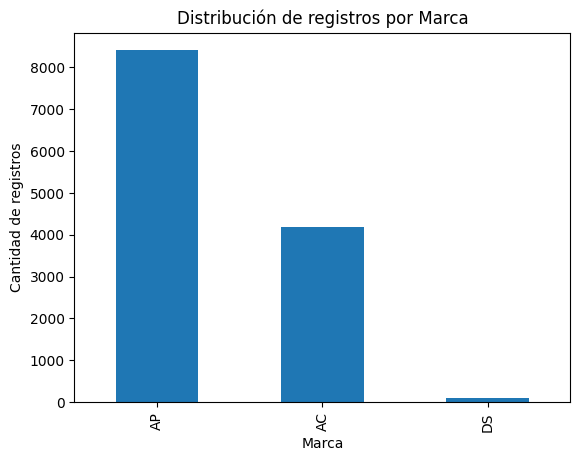

In [10]:
import matplotlib.pyplot as plt

df['Marca'].value_counts().plot(
    kind='bar',
    title='Distribución de registros por Marca',
    xlabel='Marca',
    ylabel='Cantidad de registros'
)

plt.show()


El gráfico muestra una clara predominancia de la marca **AP**, que concentra la mayor cantidad de registros del dataset, seguida por **AC**, mientras que **DS** presenta una participación significativamente menor.

Esta distribución sugiere que el análisis posterior estará fuertemente influenciado por el comportamiento de la marca AP, por lo que será relevante considerar este desbalance al momento de interpretar resultados comparativos entre marcas.


### Relación entre Marca y Canal

En esta sección se analiza la relación entre las variables *Marca* y *Canal*, con el objetivo de identificar cómo se distribuyen las marcas según el canal de comercialización.


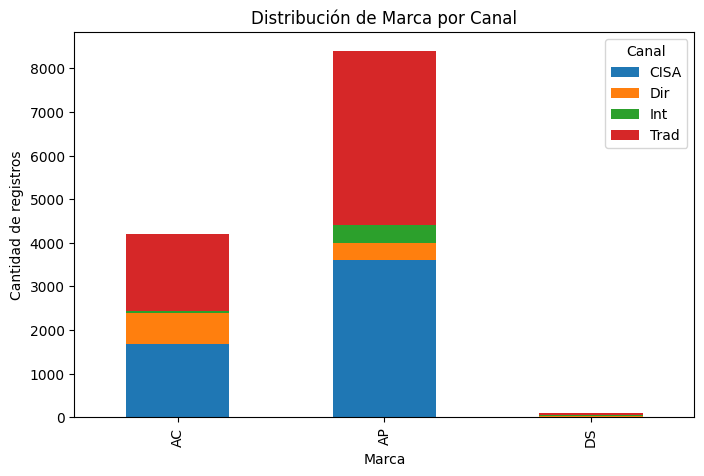

In [11]:
tabla_marca_canal = pd.crosstab(df['Marca'], df['Canal'])

tabla_marca_canal.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    title='Distribución de Marca por Canal'
)

plt.xlabel('Marca')
plt.ylabel('Cantidad de registros')
plt.legend(title='Canal')
plt.show()


El gráfico evidencia que la marca **AP** presenta una fuerte presencia en ambos canales, aunque con una mayor concentración en uno de ellos, mientras que **AC** muestra una distribución más equilibrada. Por su parte, **DS** tiene una participación marginal en ambos canales.

Esta relación sugiere que el canal de comercialización podría estar asociado al posicionamiento de cada marca, lo cual resulta relevante para análisis posteriores orientados a segmentación comercial o toma de decisiones estratégicas.


### Análisis multivariado: Marca, Canal y Familia

En esta sección se analiza de manera conjunta la relación entre las variables *Marca*, *Canal* y *Familia*, con el objetivo de identificar patrones de distribución más complejos y posibles asociaciones entre categorías del dataset.


In [12]:
tabla_multi = pd.crosstab(
    [df['Marca'], df['Canal']],
    df['Familia']
)

tabla_multi.head()


Familia      1CSFA5DEF5N09Q  1CSFA5DEF5N0A0  1CSFA5HEF5N09Q  1CSFA5HEF5N0A0  \
Marca Canal                                                                   
AC    CISA               89             100             197              60   
      Dir                40              98               2               0   
      Int                 0               3               0               2   
      Trad               45              66              16              36   
AP    CISA                0               0               0               0   

Familia      1CSFA5JT3ON0QL  1CSFA5KT3ON09Q  1CSFA5KT3ZN0A0  1CSFA5KT3ZN0NW  \
Marca Canal                                                                   
AC    CISA               19              44              78               0   
      Dir                 1               5               1               0   
      Int                 2               2               8               0   
      Trad              112              21             130               1   
AP    CISA                0               0               0               0   

Familia      1CSLSUDEF5N09U  1CSLSUDEF5N09V  ...  C3 viejo  C4  C4 CACTUS  \
Marca Canal                                  ...                            
AC    CISA               21              82  ...         0   0          1   
      Dir                 0               0  ...         2   1          0   
      Int                 0               1  ...         0   0          0   
      Trad               17               0  ...         0   0          7   
AP    CISA                0               0  ...         0   0          0   

Familia      DS 3 CROSSBACK  DS4  EXPERT  JUMPY   P21  PARTNER VP  PARTNER VU  
Marca Canal                                                                    
AC    CISA                0    0       0      3     0           0           0  
      Dir                 0    0       0     12     0           0           0  
      Int                 0    0       0      1     0           0           0  
      Trad                0    0       0     47     0           0           0  
AP    CISA                0    0      32      0  1958           0         713  

[5 rows x 57 columns]

/tmp/ipython-input-761456496.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


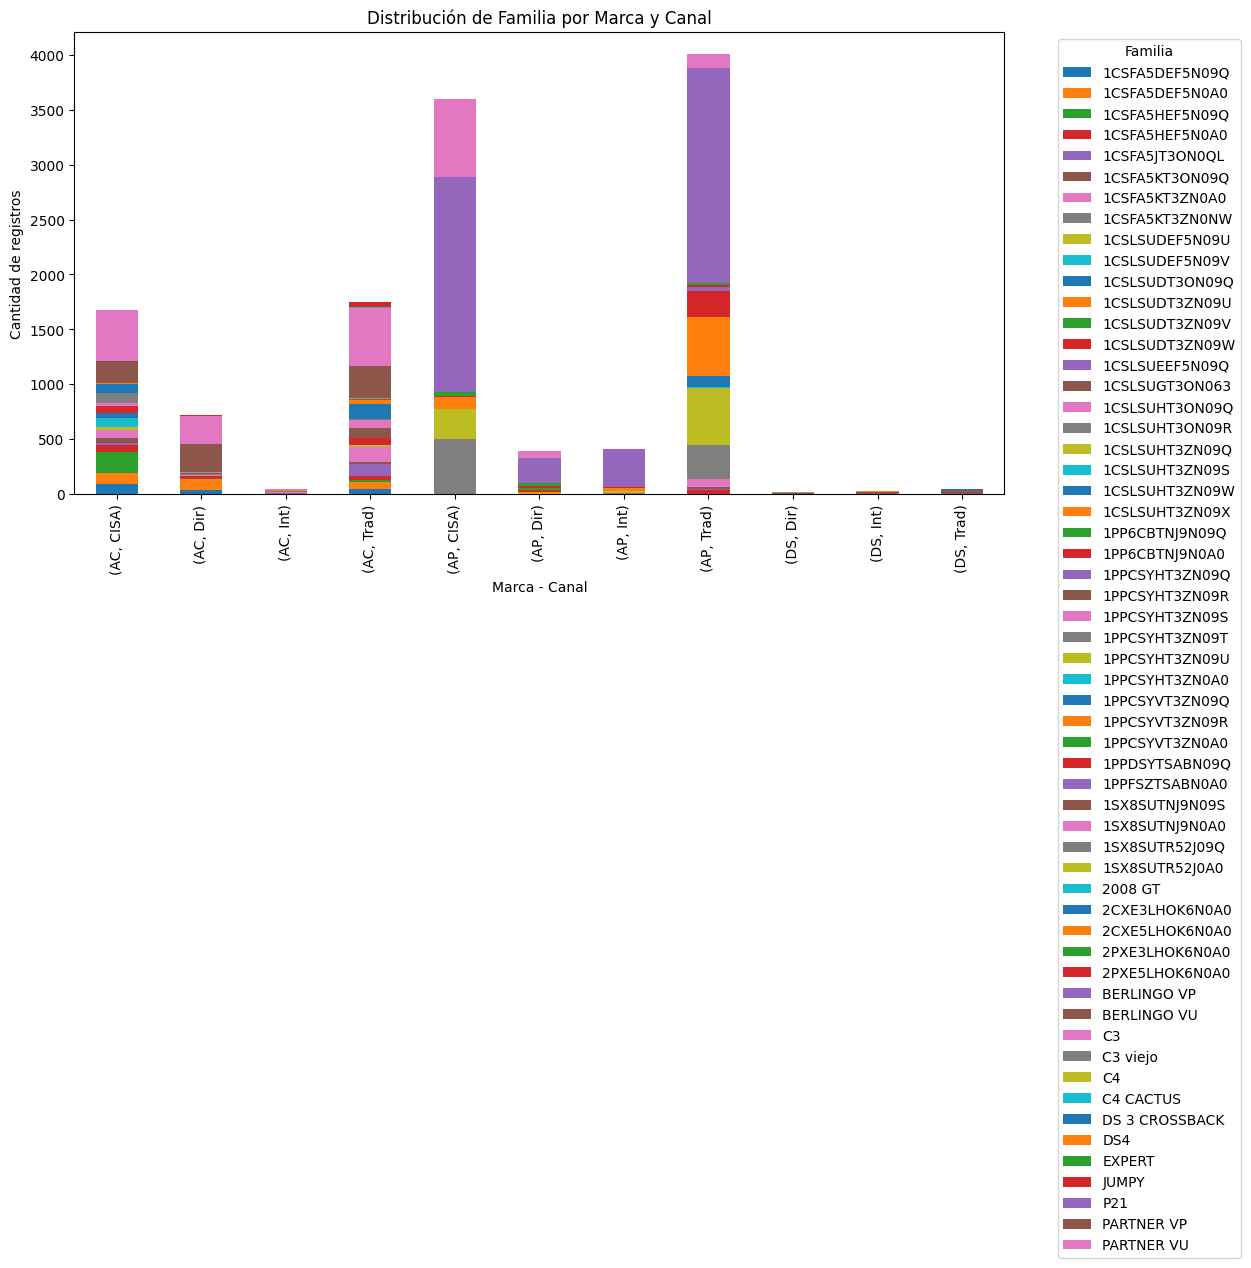

In [13]:
tabla_multi.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    title='Distribución de Familia por Marca y Canal'
)

plt.xlabel('Marca - Canal')
plt.ylabel('Cantidad de registros')
plt.legend(title='Familia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


El análisis multivariado permite observar que la distribución de las familias de productos varía significativamente según la combinación de *Marca* y *Canal*. En particular, la marca **AP** concentra la mayor diversidad de familias, especialmente en determinados canales, mientras que **AC** presenta una estructura más homogénea. La marca **DS** muestra una participación reducida y limitada a pocas familias.

Estos resultados sugieren que existe una relación entre la estrategia de marca, el canal de comercialización y el tipo de producto ofrecido, lo cual podría ser relevante para futuros análisis de segmentación, optimización comercial o toma de decisiones estratégicas.


### Hipótesis de trabajo

### Hipótesis de trabajo

- La distribución de las familias de productos no es homogénea entre marcas y canales.
- Determinadas marcas concentran su oferta en familias específicas dependiendo del canal de comercialización.
- El canal podría influir en la estrategia de posicionamiento de cada marca dentro del portfolio de productos.

Estas hipótesis podrán ser evaluadas en etapas posteriores del proyecto mediante análisis estadísticos más avanzados o modelos predictivos.

